In [1]:

import eoldas_ng
import numpy as np
import scipy.sparse as sp
from collections import OrderedDict
import random
import math

In [2]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

##Test 4.1, Verification of VARIE

In [3]:
state_config = { 'magnitude': eoldas_ng.VARIABLE }
default_values = { 'magnitude': 0.5 }
parameter_min = OrderedDict ()
parameter_max = OrderedDict ()
parameter_min [ 'magnitude' ] = -1.
parameter_max [ 'magnitude' ] = 1.
# A daily time series with 1 day sampling
state_grid = np.arange ( 1, 366,5 ) 

optimisation_options = {'ftol': 1./10000, 'gtol':1e-12, 
                        'maxcor':300, 'maxiter':1500 }

the_state = eoldas_ng.State ( state_config, state_grid, 
                                  default_values, 
                   parameter_min, parameter_max, optimisation_options=optimisation_options )


obs = np.sin(state_grid/100.)*0.9
obserr = 0.1*obs#np.ones(len(obs))*0.1

mask = np.ones(len(obs), dtype=bool)
the_obs = eoldas_ng.ObservationOperator(state_grid, obs, obserr, mask)

the_state.add_operator("observations", the_obs)

x_dict = {'magnitude':np.zeros(len(state_grid))*0.05}
retval = the_state.optimize(x0 = x_dict, do_unc=True)



Saving results to eoldas_retval_20151204_161810_SH97R.pkl


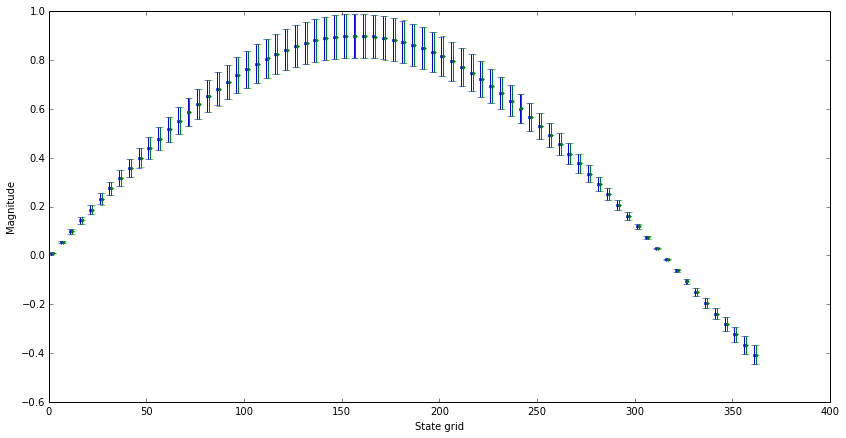

In [4]:
retunc = [math.sqrt(cov) for cov in retval['post_cov'].todense().tolist()[0]]
fig,ax = plt.subplots(figsize=(14,7))
ax.errorbar(state_grid, obs, obserr, fmt='.b')
ax.errorbar([x+1 for x in state_grid], retval['real_map']['magnitude'],
            retunc, fmt='.g')
ax.set_xlabel('State grid')
ax.set_ylabel('Magnitude')
pylab.savefig('figures/test4_1_VARIE')

In [5]:
#Add obs errors
sigma = 0.1
noise = [random.gauss(0, sigma) for i in range(len(state_grid))]
obs_noisy = obs+noise
obserr = sigma*np.ones(len(state_grid))

new_state = eoldas_ng.State ( state_config, state_grid, 
                                  default_values, 
                   parameter_min, parameter_max, optimisation_options=optimisation_options )

new_obs = eoldas_ng.ObservationOperator(state_grid, obs_noisy, obserr, mask)

the_state.add_operator("observations", new_obs)
new_retval = the_state.optimize(x0 = x_dict, do_unc=True)

new_retunc = [math.sqrt(cov) for cov in new_retval['post_cov'].todense().tolist()[0]]

Saving results to eoldas_retval_20151203_173506_SH97R.pkl


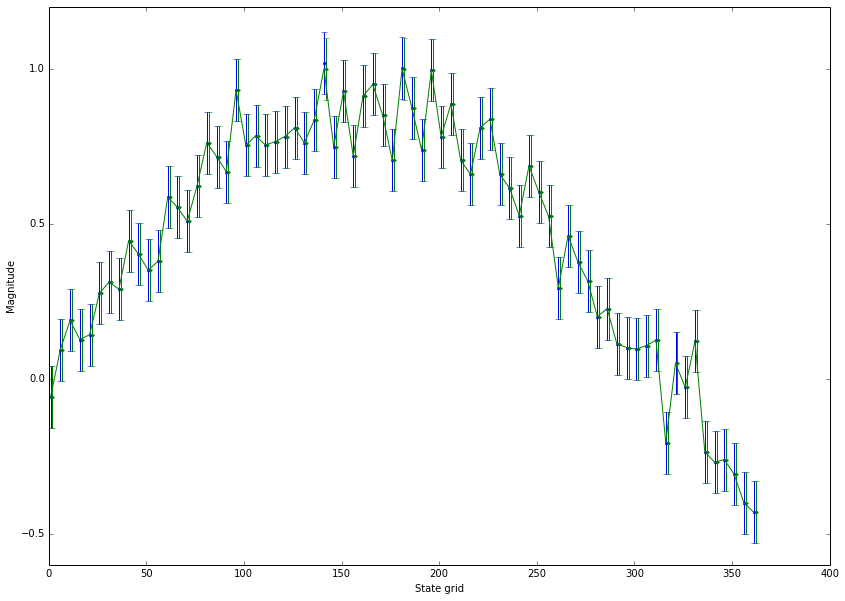

In [6]:
fig,ax = plt.subplots(figsize=(14,10))
ax.errorbar(state_grid, obs_noisy, obserr, fmt = '.')
ax.errorbar([x+1 for x in state_grid], new_retval['real_map']['magnitude'],
            new_retunc, fmt='.g')
ax.plot(state_grid, new_retval['real_map']['magnitude'])
#ax.plot(state_grid, obs, '--')

ax.set_xlabel('State grid')
ax.set_ylabel('Magnitude')
pylab.savefig('figures/test4_1_VARIE2')